# Nama : M. Taufik

# Nim : 09011281823073

# Kelas : SK 5 B Inderalaya

#                             TUGAS UTS KECERDASAN BUATAN

# Gender Prediction with Logistic Regression and ANN

# Source : https://www.kaggle.com/erdemuysal/gender-prediction-with-logistic-regression-and-ann

Pada tugas ini saya memakai data berupa Memprediksi Jenis Kelamin dengan logika Regresi dan Artificial Neural Network. Dari dataset ini menghasilkan output akhir berupa pengklasifikasian jenis kelamin memakai Logika regresi dan Jaringan syaraf tiruan

Adapun Pengertian regresi dalam statistika adalah salah satu metode untuk menentukan hubungan sebab-akibat antara satu variabel dengan variabel(-variabel) yang lain. Variabel "penyebab" disebut dengan bermacam-macam istilah: variabel penjelas, variabel eksplanatorik, variabel independen, atau secara bebas, variabel X (karena sering kali digambarkan dalam grafik sebagai absis, atau sumbu X). Variabel terkena akibat dikenal sebagai variabel yang dipengaruhi, variabel dependen, variabel terikat, atau variabel Y. Kedua variabel ini dapat merupakan variabel acak (random), namun variabel yang dipengaruhi harus selalu variabel acak. 

Cara kerja Neural Network dapat dianalogikan sebagaiman halnya manusia belajar dengan mengunakan contoh atau yang disebut sebagai supervised learning. Sebuah Neural Network dikonfigurasi untuk aplikasi tertentu, seperti pengenalan pola atau klasifikasi data, dan kemudian disempurnakan melalui proses pembelajaran

Adapun struktur dari keseluruhan dataset yang ditampilkan yaitu :

> * Data Preparation (Persiapan data)
> * Logistic Regression
> * Logistic Regression with Scikit Learn
> * 2 Layer ANN
> * 3 Layer ANN with Keras

## Data Exploration and Preparation (Import jenis" library yang digunakan)
Selain import data berupa Numpy( library Python yang fokus pada scientific computing.), Pandas( sebuah open source python package/library yang menyediakan banyak perkakas untuk kebutuhan data analisis, manipulasi dan pembersihan data. ), Matlotlib(librari plotting 2D Python yang menghasilkan gambar ) seperti dibawah . Saya juga menginstall Python 3.7, tencorflow, Python Keras pada command prom anaconda.

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # visualization

import os
print(os.listdir("input"))

[]


# Import Dataset

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.label = [1 if each == "male" else 0 for each in data.label]
data.label.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [7]:
y = data.label.values
x = data.drop(['label'],axis=1)
x = (x-np.min(x))/(np.max(x)-np.min(x)).values  # Normalize

print("y: ", y.shape)
print("x: ", x.shape)

y:  (3168,)
x:  (3168, 20)


## Logistic Regression

Logika regresi adalah salah satu analisis yang paling populer dan luas pemakaiannya. Regresi juga dapat berlogika garis tengah yang memisahkan data dari sebuah data seperti sumbu x dan y berupa sekumpulan titik dan garis pembagi antara titik tersebut yang dillogikankan sebagai regresi .Analisis regresi juga dipakai secara luas untuk melakukan prediksi dan ramalan, dengan penggunaan yang saling melengkapi dengan bidang pembelajaran mesin. Analisis ini juga digunakan untuk memahami variabel bebas mana saja yang berhubungan dengan variabel terikat, dan untuk mengetahui bentuk-bentuk hubungan tersebut. 

### Weight dan Bias

Weight adalah parameter dalam jaringan neural yang mengubah data masukan dalam lapisan tersembunyi jaringan. Jaringan saraf adalah serangkaian node, atau neuron. Dalam setiap node adalah satu set input, bobot, dan nilai bias. 

Bias merupakan nilai konstan yang ditambahkan ke produk input dan bobot. Bias digunakan untuk mengimbangi hasil. Bias digunakan untuk menggeser hasil fungsi aktivasi ke arah positif atau negatif.

In [8]:
def init_weights_and_bias(dim):
    '''
    Shape of weights:  (20, 1)
    Shape of bias:  (20, 1)
    '''
    weights = np.full((dim, 1),0.01)
    bias = np.zeros(dim).reshape(-1, 1)
    return weights, bias

weights, bias = init_weights_and_bias(20)
print("Shape of weights: ", weights.shape)
print("Shape of bias: ", bias.shape)

Shape of weights:  (20, 1)
Shape of bias:  (20, 1)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

features = x_train.T
labels = y_train.T
test_features = x_test.T
test_labels = y_test.T

print("features: ", features.shape)
print("labels: ", labels.shape)
print("test_features: ", test_features.shape)
print("test_labels: ", test_labels.shape)

features:  (20, 2534)
labels:  (2534,)
test_features:  (20, 634)
test_labels:  (634,)


## Sigmoid
sigmoid bersifat umum dalam statistik sebagai fungsi distribusi kumulatif (yang berubah dari 0 ke 1), 
seperti integral dari kepadatan logistik , kepadatan normal , dan fungsi kepadatan probabilitas  . 
Fungsi sigmoid logistik dapat dibalik, dan kebalikannya adalah fungsi logit. Fungsi lain sigmoid yaitu dapat memiliki domain semua bilangan real , dengan nilai balik (respon) yang umumnya meningkat secara monoton tetapi bisa juga menurun. Fungsi sigmoid paling sering menunjukkan nilai kembali (sumbu y) dalam rentang 0 hingga 1. Rentang lain yang umum digunakan adalah dari −1 hingga 1. 

In [10]:
def sigmoid(Z):
    yHat = 1 / (1 + np.exp(-Z))
    return yHat

#  Back Propagation 

Backpropagation ini merupakan perkembangan dari single layer network (Jaringan Layar Tunggal) yang memiliki dua layer, yaitu input layer dan output layer. Adapun Back propagation memiliki tiga algoritma utama berupa Pengambilan input, Penelusuran error, Penyesuaian bobot. Backpropagation juga merupakan sebuah metode sistematik untuk pelatihan multilayer JST. Backpopagation dikatakan sebagai algoritma pelatihan multilayer karena Backpropagation memiliki tiga layer dalam proses pelatihannya, yaitu input layer, hidden layer dan output layer. 

In [11]:
def feedforward_back_prop(weights, bias, features, labels):
    '''
    features:  (20, 2534)
    weights: (20, 1)
    weights.T: (1, 20)
    bias: (20, 1)
    yHat: (1, 2534)
    '''
    # Feed Forward Propagation
    Z = np.dot(weights.T, features ) + bias
    yHat = sigmoid(Z)
    # Cost Function
    loss = -labels*np.log(yHat)-(1-labels)*np.log(1-yHat)
    cost = (np.sum(loss))/features.shape[1]
    # Backward Propagation
    dW = (np.dot(features, ((yHat-labels).T)))/features.shape[1]
    dB = np.sum(yHat-labels)/features.shape[1]
    grads = {"dW": dW, "dB": dB}
    return cost, grads

cost, grads = feedforward_back_prop(weights, bias, features, labels)

In [12]:
def update(weights, bias, features, labels, lr, reiter):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(reiter):
        
        cost, grads = feedforward_back_prop(weights, bias, features, labels)
        #cost = cost_function(features, labels, weights, bias)
        cost_list.append(cost)
        #Let's update
        weights = weights - lr * grads["dW"]
        bias = bias - lr * grads["dB"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weights": weights, "bias": bias}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, grads, cost_list

# Logika regresi 
Logika regresi adalah salah satu analisis yang paling populer dan luas pemakaiannya. Regresi juga dapat berlogika garis tengah yang memisahkan data dari sebuah data seperti sumbu x dan y berupa sekumpulan titik dan garis pembagi antara titik tersebut yang dillogikankan sebagai regresi .Analisis regresi juga dipakai secara luas untuk melakukan prediksi dan ramalan, dengan penggunaan yang saling melengkapi dengan bidang pembelajaran mesin. Analisis ini juga digunakan untuk memahami variabel bebas mana saja yang berhubungan dengan variabel terikat, dan untuk mengetahui bentuk-bentuk hubungan tersebut.

In [13]:
def logistic_regression(features, labels, test_features, test_labels, lr ,  reiter):
    # Initialize
    # lr: learning rate
    
    dim =  features.shape[0]
    # dim =  features.shape[0]: 20 for our case
    weights, bias = init_weights_and_bias(dim)
    # Shape of weights:  (20, 1)
    # Shape of bias:  (20, 1)
    parameters, grads, cost_list = update(weights, bias, features, labels, lr, reiter)
    
    prediction_test = predict(parameters["weights"], parameters["bias"],test_features)

    # Print test Errors
    print("Model A test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - test_labels)) * 100))

## Prediksi Akurasi

Pada program dibawah menampilkan prediksi akurasi untuk pengambilan keputusan strategis seperti manajemen inventaris, perencanaan anggaran, manajemen hubungan pelanggan, promosi pemasaran, dan alokasi sumber daya yang efisien yang mana data deret waktu sangat penting untuk tingkat ketinggian akurasi.


In [14]:
def predict(weights, bias, test_features):
    # test_features are a input for feed forward propagation
    Z = sigmoid(np.dot(weights.T, test_features) + bias)
    prediction = np.zeros((1, test_features.shape[1]))
    for i in range(Z.shape[1]):
        if Z[0, i] <= 0.5:
            prediction[0, i] = 0
        else:
            prediction[0, i] = 1  
    return prediction

### Output grafik Logistic Regression

Cost after iterations 0: 13.914662
Cost after iterations 10: 13.511259
Cost after iterations 20: 13.184068
Cost after iterations 30: 12.888414
Cost after iterations 40: 12.620282
Cost after iterations 50: 12.376160
Cost after iterations 60: 12.152998
Cost after iterations 70: 11.948153
Cost after iterations 80: 11.759345
Cost after iterations 90: 11.584609
Cost after iterations 100: 11.422252
Cost after iterations 110: 11.270813
Cost after iterations 120: 11.129036
Cost after iterations 130: 10.995831
Cost after iterations 140: 10.870259
Cost after iterations 150: 10.751504
Cost after iterations 160: 10.638857
Cost after iterations 170: 10.531702
Cost after iterations 180: 10.429499
Cost after iterations 190: 10.331779
Cost after iterations 200: 10.238127
Cost after iterations 210: 10.148180
Cost after iterations 220: 10.061618
Cost after iterations 230: 9.978158
Cost after iterations 240: 9.897549
Cost after iterations 250: 9.819568
Cost after iterations 260: 9.744017
Cost after itera

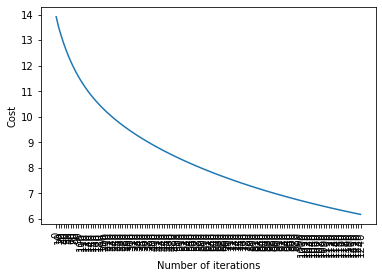

Model A test accuracy: 93.37539432176656 %


In [15]:
logistic_regression(features, labels, test_features, test_labels, lr = 0.1 ,  reiter= 1250) 

## Logistic Regression with ScikitLearn
Scikitlearn merupakan sebuah package yang berguna untuk pustaka pembelajaran mesin perangkat lunak gratis untuk bahasa pemrograman Python. 

In [16]:
from sklearn.linear_model import LogisticRegression
Model_B = LogisticRegression()
Model_B.fit(x_train,y_train)
print("Model B test accuracy: {}".format(Model_B.score(x_test,y_test)))

Model B test accuracy: 0.9826498422712934


## 2 Layer ANN

Pengoperasian model ANN menggunakan 2 layer

In [17]:
labels = y_train.reshape(y_train[0], -1)
test_labels = y_test.reshape(y_test[1], -1)

print("features: ", features.shape)
print("labels: ", labels.shape)
print("test_features: ", test_features.shape)
print("test_labels: ", test_labels.shape)

features:  (20, 2534)
labels:  (1, 2534)
test_features:  (20, 634)
test_labels:  (1, 634)


## Metode ANN 
Jaringan syaraf tiruan adalah jaringan dari sekelompok unit pemroses kecil yang dimodelkan berdasarkan sistem saraf manusia. JST merupakan sistem adaptif yang dapat mengubah strukturnya untuk memecahkan masalah berdasarkan informasi eksternal maupun internal yang mengalir melalui jaringan tersebut.Adapun pemanfaatan model ANN seperti tampilan program dibawah.

###  Forward Propagation
Forward Propagation adalah operasi yang akan dilakukan pada setiap elemen pada input dan tiap weight yang terhubung dengan input dan ditambahkan dengan bias. Hasil dari operasi ini akan dimasukkan ke dalam activation function.

### Update Parameter
Parameter pada umumnya adalah karakteristik apa pun yang dapat membantu dalam mendefinisikan atau mengklasifikasikan sistem tertentu. Artinya, parameter adalah elemen sistem yang berguna, atau kritis, saat mengidentifikasi sistem, atau saat mengevaluasi kinerjanya, status, kondisi. Parameter juga dapat didefinisikan sebagai koefisien model, dan mereka dipilih oleh model itu sendiri. Ini berarti bahwa algoritme, saat belajar, mengoptimalkan koefisien ini (sesuai dengan strategi pengoptimalan yang diberikan) dan mengembalikan serangkaian parameter yang meminimalkan kesalahan. Contoh pemanfaatannya terdapat dalam tugas regresi linier,

In [18]:
class ArtificialNeuralNetwork(object):
    
    def __init__(self, xTrain, xTest, yTrain, yTest):
        # Define train and test data
        self.xTrain = xTrain
        self.xTest = xTest
        self.yTrain = yTrain.reshape(yTrain.shape[0],-1)
        self.yTest = yTest.reshape(yTest.shape[0],-1)

        # Define hyperparameters
        self.inputLayerSize = self.xTrain.shape[0] # nx <-> Number of features
        self.hiddenLayerSize = 4
        self.outputLayerSize = self.yTrain.shape[0]
        
    def initializeWeightsAndBias(self): #, inputLayerSize, hiddenLayerSize, outputLayerSize):
        """
        This function creates a vector of zeros of shape (inputLayerSize, 1) for w and initializes b to 0.

        Argument:
        inputLayerSize -- size of the input layer
        hiddenLayerSize -- size of the hidden layer
        outputLayerSize -- size of the output layer

        Returns:
        params -- python dictionary containing your parameters:
                        W1 -- weight matrix of shape (hiddenLayerSize, inputLayerSize)
                        b1 -- bias vector of shape (hiddenLayerSize, 1)
                        W2 -- weight matrix of shape (outputLayerSize, hiddenLayerSize)
                        b2 -- bias vector of shape (outputLayerSize, 1)
        """
        np.random.seed(23) # We set up a seed so that your output matches ours 
                           # although the initialization is random.
        
        W1 = np.random.randn(self.inputLayerSize, 
                             self.hiddenLayerSize) * 0.01
        b1 = np.zeros(shape=(self.hiddenLayerSize, 1))
        W2 = np.random.randn(self.hiddenLayerSize,
                             self.outputLayerSize) * 0.01
        b2 = np.zeros(shape=(self.outputLayerSize, 1))
        
        # assert(isinstance(B1, float) or isinstance(B1, int))
        
        assert (W1.shape == (self.inputLayerSize, self.hiddenLayerSize)), "[W1] -> Unsuitable matrix size"
        assert (b1.shape == (self.hiddenLayerSize, 1))
        assert (W2.shape == (self.hiddenLayerSize, self.outputLayerSize)), "[W2] -> Unsuitable matrix size"
        assert (b2.shape == (self.outputLayerSize, 1))
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}   
        
        return parameters
    
    def sigmoid(self, Z):
        """ Apply and compute sigmoid activation function to scalar, vector, or matrix (Z)

        Arguments:
        Z -- A scalar or numpy array of any size.

        Return:
        s -- sigmoid(z)
        """
        return 1/(1+np.exp(-Z))
    
    def forwardPropagation(self, X, parameters):
        """ Propogate inputs though network
        
        Argument:
        X -- input data of size (inputLayerSize, m)
        parameters -- python dictionary containing your parameters (output of initialization function)

        Returns:
        A2 -- The sigmoid output of the second activation
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
        """
        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        # Implement Forward Propagation to calculate A2 (probabilities)
        Z1 = np.dot(W1.T, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2.T, A1) + b2
        yHat = self.sigmoid(Z2) # A2

        assert(yHat.shape == (1, X.shape[1]))
    
        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "yHat": yHat}    # A2
    
        return yHat, cache
    
    def computeCost(self, yHat, Y, parameters):
        """ Compute cost for given X,Y, use weights already stored in class 

        Arguments:
        yHat -- The sigmoid output of the second activation, of shape (1, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        parameters -- python dictionary containing your parameters W1, b1, W2 and b2

        Returns:
        cost -- cross-entropy cost given equation (13)
        """
        m = Y.shape[1] # number of example
                      
        # Retrieve W1 and W2 from parameters
        W1 = parameters['W1']
        W2 = parameters['W2']   
                    
        # Loss
        logprobs = np.multiply(np.log(yHat), Y) + np.multiply((1 - Y), np.log(1 - yHat))
        # Cost
        cost = - (np.sum(logprobs)) / m     # m =  yTrain.shape[1]  is for scaling
        
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
        assert(isinstance(cost, float))
                      
        return cost

    def backwardPropagation(self,parameters, cache,  X, Y):
        """ Compute the gradients of parameters by implementing the backward propagation

        Arguments:
        parameters -- python dictionary containing our parameters 
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
        X -- input data of shape (2, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)

        Returns:
        grads -- python dictionary containing your gradients with respect to different parameters
        """
        m = X.shape[1]   
                      
        # First, retrieve W1 and W2 from the dictionary "parameters".       
        W1 = parameters['W1']
        W2 = parameters['W2']
                      
        # Retrieve also A1 and A2 from dictionary "cache".
        A1 = cache['A1']
        yHat = cache['yHat']                    
                      
        # Backward propagation: calculate dW1, db1, dW2, db2.                     
        dZ2 = yHat - Y
        dW2 = (1 / m) * np.dot(A1, dZ2.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(X, dZ1.T)#(1 / m) * np.dot(dZ1, self.xTrain.T) # MATRIS BOYUTLARINA BAK dW1 ve dW2 ICIN
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)   # m is for scaling 

        gradients = {"dW1": dW1,
                     "db1": db1,
                     "dW2": dW2,
                     "db2": db2}
                      
        return gradients
    
    def updateParameters(self, parameters, gradients, learning_rate = 0.15):
        """
        Updates parameters using the gradient descent update rule given above

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients 

        Returns:
        parameters -- python dictionary containing your updated parameters 
        """
        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        # Retrieve each gradient from the dictionary "grads"
        dW1 = gradients['dW1']
        db1 = gradients['db1']
        dW2 = gradients['dW2']
        db2 = gradients['db2']
        
        # Update rule for each parameter
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters
                      
    def model(self, X, Y, num_iterations=10000, print_cost=False):
        """
        Arguments:
        X -- dataset of shape (2, number of examples)
        Y -- labels of shape (1, number of examples)
        n_h -- size of the hidden layer
        num_iterations -- Number of iterations in gradient descent loop
        print_cost -- if True, print the cost every 1000 iterations

        Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
        """
        np.random.seed(3)
        
        costStr = []
        indexStr = []
        
        # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
        parameters = self.initializeWeightsAndBias()

        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
 
        # Loop (gradient descent)
        for i in range(0, num_iterations):
                      
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            yHat, cache = self.forwardPropagation(X, parameters)

            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = self.computeCost(yHat, Y, parameters)
            
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            gradients = self.backwardPropagation(parameters, cache, X, Y)

            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
            parameters = self.updateParameters(parameters, gradients)

            # Print the cost every 1000 iterations
            if print_cost and i % 1000 == 0:
                costStr.append(cost)
                indexStr.append(i)
                print ("Cost after iteration %i: %f" % (i, cost))
            """
            # Plot Cost Function
            plt.plot(indexStr,costStr)
            plt.xticks(indexStr,rotation='vertical')
            plt.xlabel("Number of Iterarion")
            plt.ylabel("Cost")
            plt.show()
            """
        return parameters

    def predict(self, parameters, X):
        """
        Using the learned parameters, predicts a class for each example in X

        Arguments:
        parameters -- python dictionary containing your parameters 
        X -- input data of size (n_x, m)

        Returns
        predictions -- vector of predictions of our model (red: 0 / blue: 1)
        """
        # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
        yHat, cache = self.forwardPropagation(X, parameters)
        predictions = np.round(yHat)

        
        return predictions

In [19]:
ANN = ArtificialNeuralNetwork(features, test_features, labels, test_labels)
parameters = ANN.model(features, labels, num_iterations = 12000, print_cost=True)
predictions = ANN.predict(parameters, features)
print('Train Accuracy: %d' % float((np.dot(labels, predictions.T) + np.dot(1 - labels, 1 - predictions.T)) / float(labels.size) * 100) + '%')

Cost after iteration 0: 0.693338
Cost after iteration 1000: 0.537436
Cost after iteration 2000: 0.454870
Cost after iteration 3000: 0.347725
Cost after iteration 4000: 0.290624
Cost after iteration 5000: 0.256894
Cost after iteration 6000: 0.226229
Cost after iteration 7000: 0.164414
Cost after iteration 8000: 0.118214
Cost after iteration 9000: 0.126296
Cost after iteration 10000: 0.127759
Cost after iteration 11000: 0.121675
Train Accuracy: 97%


In [20]:
parameters = ANN.model(test_features, test_labels, num_iterations = 12000, print_cost=True)
predictions = ANN.predict(parameters, test_features)
print("Test Accuracy: %d" % float((np.dot(test_labels, predictions.T) + np.dot(1 - test_labels, 1 - predictions.T)) / float(test_labels.size) * 100) + '%')

Cost after iteration 0: 0.692609
Cost after iteration 1000: 0.593128
Cost after iteration 2000: 0.378382
Cost after iteration 3000: 0.301035
Cost after iteration 4000: 0.277850
Cost after iteration 5000: 0.265836
Cost after iteration 6000: 0.256918
Cost after iteration 7000: 0.247743
Cost after iteration 8000: 0.201890
Cost after iteration 9000: 0.229451
Cost after iteration 10000: 0.223250
Cost after iteration 11000: 0.258326
Test Accuracy: 89%


### Hasil Kesimpulan 
Dari dataset pemanfaatan Logika rekresi dan ANN untuk Penjenisan gender, menghasilkan output akhir berupa pengklasifikasian jenis kelamin berdasarkan ciri-cirinya berjalan dengan mulus, dengan tingkat akurasi kebenaran yang tinggi berkisar 89% - 97%.